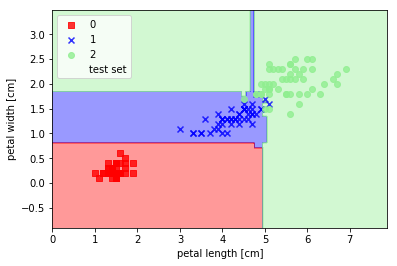

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup markers generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 =  np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    # hightlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')


def main():
  iris = datasets.load_iris()
  x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, test_size=0.25, random_state=4)
  clf = RandomForestClassifier(n_estimators=20, max_depth=4)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  X_combined = np.vstack((x_train, x_test))
  y_combined = np.hstack((y_train, y_test))
  
  plot_decision_regions(X_combined, y_combined, classifier=clf, test_idx=range(105, 150))
  plt.xlabel('petal length [cm]')
  plt.ylabel('petal width [cm]')
  plt.legend(loc='upper left')
  plt.show()

if __name__ == '__main__':
  main()
